In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from collections import Counter
import nltk

Dataset link: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

## Convert train.txt to train.csv

In [20]:
with open('C:/Users/Asus/PYTHON_C/DLBBT01/data/a_raw_labeled/train.txt', 'r') as input_file, open(
    'C:/Users/Asus/PYTHON_C/DLBBT01/data/a_raw_labeled/train.csv', 'w', newline='') as output_file:
        
        reader = csv.reader(input_file, delimiter=';')
        writer = csv.writer(output_file)
        writer.writerow(['text', 'sentiment'])

        for row in reader:
            writer.writerow(row)

# train data

In [21]:
train_df = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/a_raw_labeled/train.csv', encoding='utf-8')

In [22]:
#labeling
reviews = np.array(train_df['text'])[:]
labels = np.array(train_df['sentiment'])[:]
Counter(labels)

Counter({'sadness': 4666,
         'anger': 2159,
         'love': 1304,
         'surprise': 572,
         'fear': 1937,
         'joy': 5362})

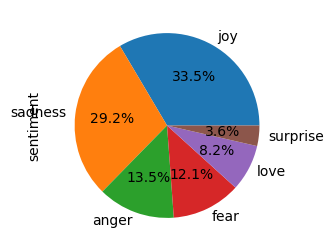

In [23]:
label_count = train_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

# test data

In [24]:
with open('C:/Users/Asus/PYTHON_C/DLBBT01/data/a_raw_labeled/test.txt', 'r') as input_file, open(
    'C:/Users/Asus/PYTHON_C/DLBBT01/data/a_raw_labeled/test.csv', 'w', newline='') as output_file:
        
        reader = csv.reader(input_file, delimiter=';')
        writer = csv.writer(output_file)
        writer.writerow(['text', 'sentiment'])

        for row in reader:
            writer.writerow(row)

In [25]:
test_df = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/a_raw_labeled/test.csv', encoding='utf-8')

In [26]:
#labeling
reviews = np.array(test_df['text'])[:]
labels = np.array(test_df['sentiment'])[:]
Counter(labels)

Counter({'sadness': 581,
         'joy': 695,
         'fear': 224,
         'anger': 275,
         'love': 159,
         'surprise': 66})

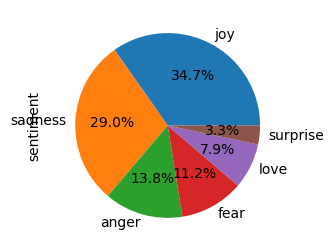

In [27]:
label_count = test_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

### Both train dan text dataset are Imbalance Datasets

# Oversampling with imblearn on train dataset

Using RandomOverSampler from the imblearn library to balance an imbalanced datase:

1.Calculate the count of each class label in the original dataset using Counter()

2.Select a target count that represents the count of 'joy' class label to balance with. 

3.Create an instance of RandomOverSampler & specify the target count for each class label using a dictionary that maps each label to the target count.

4.Fit the oversampler on the original dataset using fit_resample() and pass the text values and label values as two separate arguments.

5.Convert the resampled data to a pandas DataFrame.

In [ ]:
!pip install imblearn

In [28]:
from imblearn.over_sampling import RandomOverSampler

mylabels = train_df['sentiment']
label_counts = Counter(mylabels)

# set target count to 'joy' class
target_count = label_counts['joy']

# create the oversampler, apply 
ros = RandomOverSampler(sampling_strategy={label: target_count for label in label_counts})
x_resampled, y_resampled = ros.fit_resample(train_df['text'].values.reshape(-1, 1), mylabels)

# convert the resampled data to df
train_df_resampled = pd.DataFrame({'text': x_resampled.flatten(), 'sentiment': y_resampled})

print(Counter(train_df_resampled['sentiment']))

Counter({'sadness': 5362, 'anger': 5362, 'love': 5362, 'surprise': 5362, 'fear': 5362, 'joy': 5362})


In [29]:
train_df_resampled.to_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/b_processed_labeled/train.csv', index=False)

In [30]:
train_df = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/b_processed_labeled/train.csv', encoding='utf-8')
train_df.shape

(32172, 2)

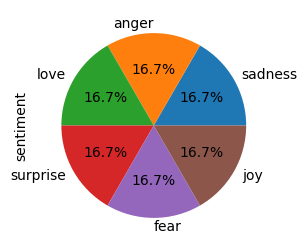

In [31]:
label_count = train_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

# Oversampling with imblearn on test dataset

In [32]:
# get the labels and their counts
herlabels = test_df['sentiment']
herlabel_counts = Counter(herlabels)

# set the target count to the count of the 'joy' class
target_count = herlabel_counts['joy']

# create the oversampler and apply it to the data
ros = RandomOverSampler(sampling_strategy={label: target_count for label in herlabel_counts})
x_resampled, y_resampled = ros.fit_resample(test_df['text'].values.reshape(-1, 1), herlabels)

# convert the resampled data to a dataframe
test_df_resampled = pd.DataFrame({'text': x_resampled.flatten(), 'sentiment': y_resampled})

print(Counter(test_df_resampled['sentiment']))

Counter({'sadness': 695, 'joy': 695, 'fear': 695, 'anger': 695, 'love': 695, 'surprise': 695})


In [33]:
test_df_resampled.to_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/b_processed_labeled/test.csv', index=False)

In [34]:
test_df = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/b_processed_labeled/test.csv', encoding='utf-8')
test_df.shape

(4170, 2)

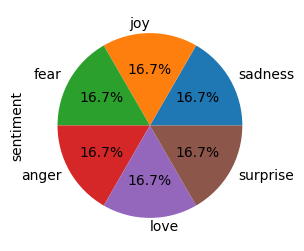

In [35]:
label_count = test_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

# Now both train and test dataset are perfectly balanced